In [2]:
# Upload local file manually
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
# Install dependencies (if not already installed)
!pip install seaborn plotly

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset (replace 'titanic.csv' with your file name if different)
df = pd.read_csv("Titanic-Dataset.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Below given code shows :**
-->   // Output & Insights:

Age: mean ≈ 29.7, max = 80, min = 0.42.

Fare: mean ≈ 32, max = 512 → very high outliers.

SibSp and Parch: most values are 0 (people traveling alone).

In [5]:
# Check dataset info
df.info()

# Generate summary statistics
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Below code shows:
-->//Output & Insights:

Age: bell-shaped distribution around 20–40.

Fare: skewed → most paid <50, few paid hundreds.

SibSp & Parch: mostly zero, a few large families.

Boxplots confirm extreme Fare outliers

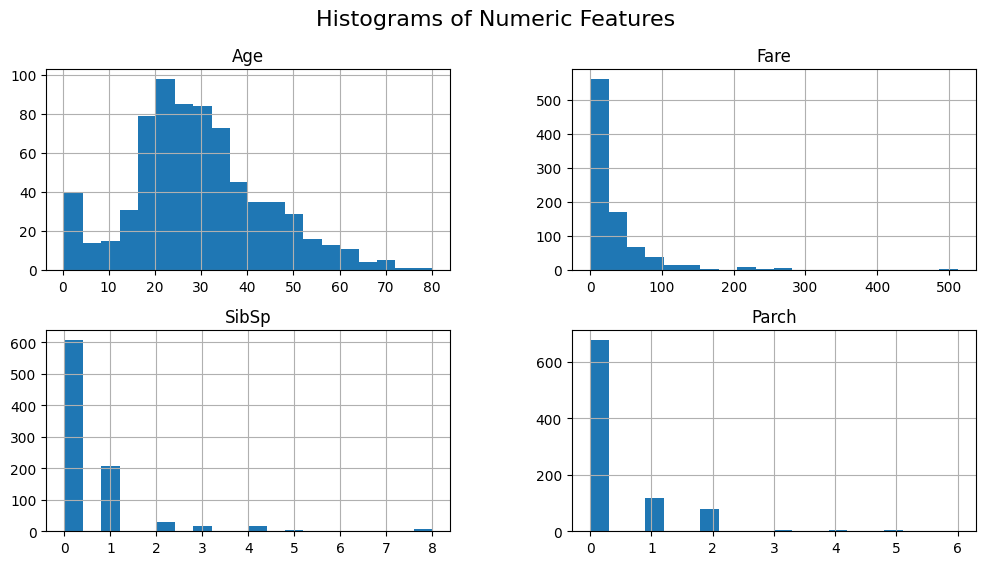

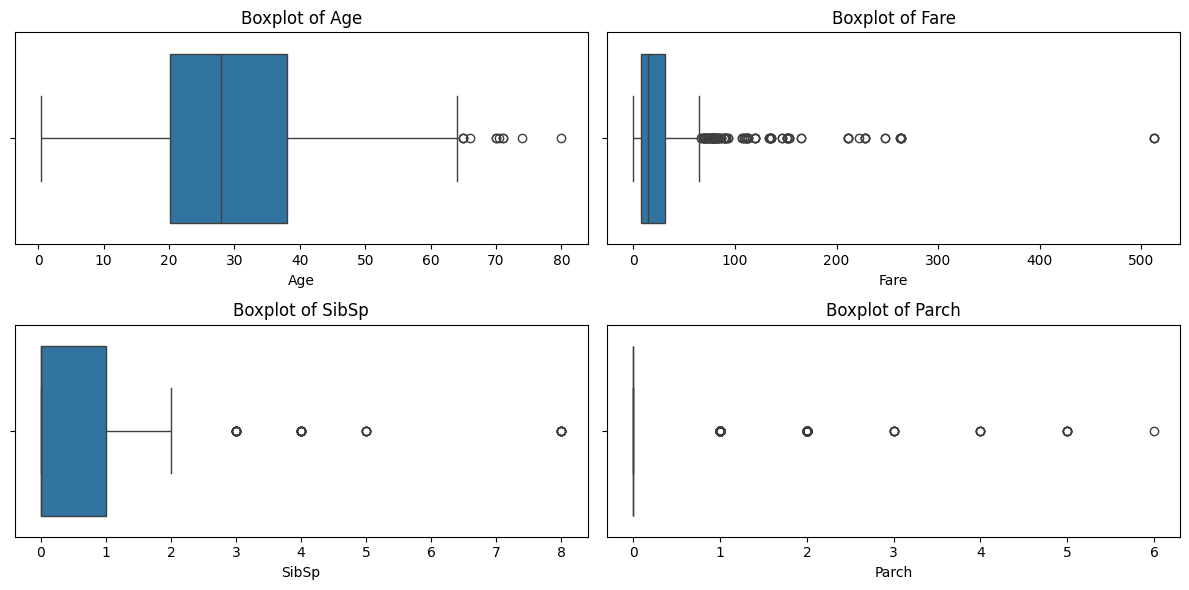

In [6]:
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms
df[numeric_cols].hist(bins=20, figsize=(12,6))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


✅ Output & Insights:

Heatmap:

 . Fare positively correlated with Survived.

 . Pclass negatively correlated with Fare.

Pairplot:

 . Survivors → higher fares, more in 1st class.

 . Non-survivors → mostly lower fares.

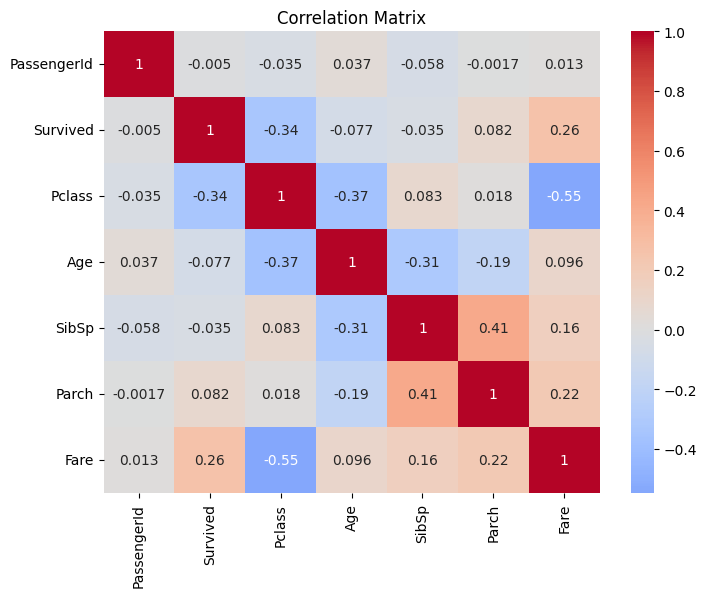

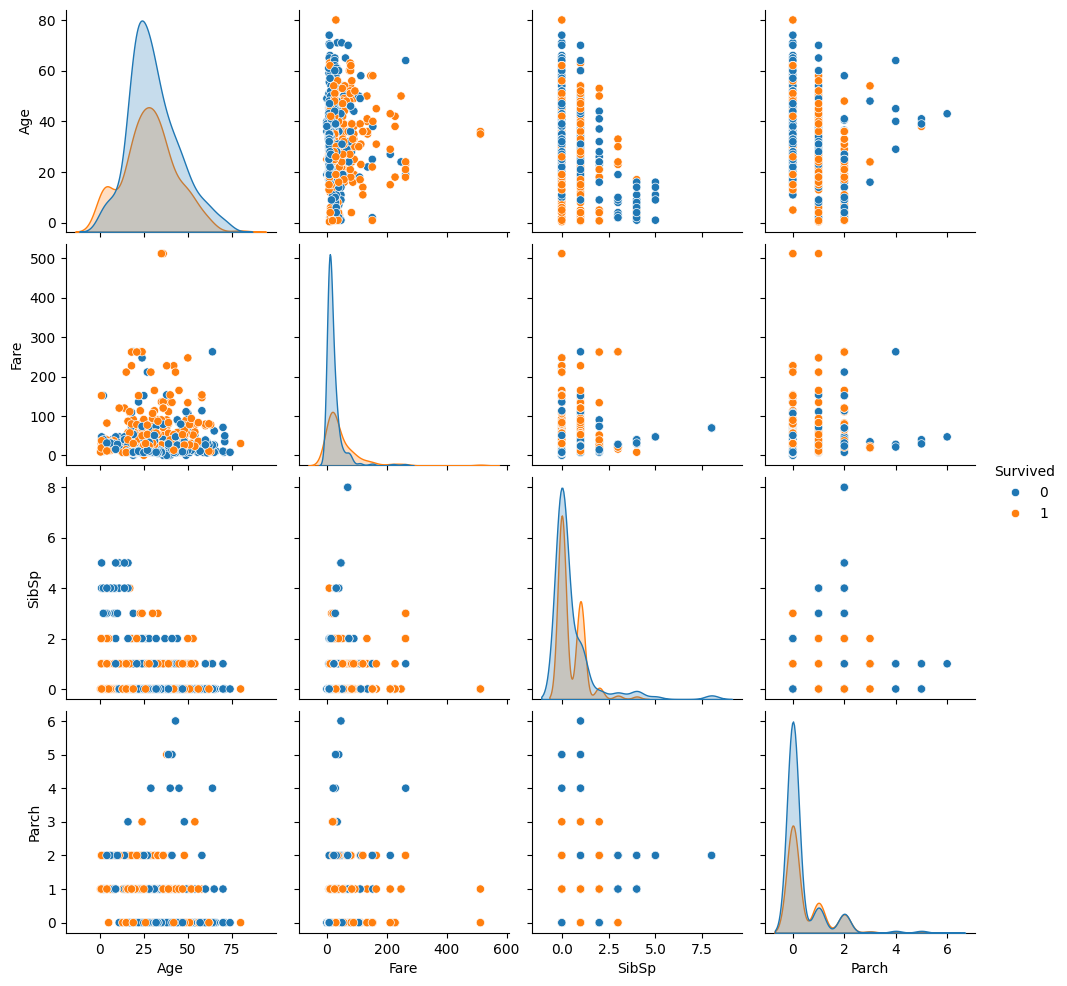

In [7]:
# Correlation matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Pairplot with survival hue
sns.pairplot(df[["Age", "Fare", "SibSp", "Parch", "Survived"]], hue="Survived")
plt.show()


--> Insight:

Females survival rate ≈ 75%, males much lower (~20%)

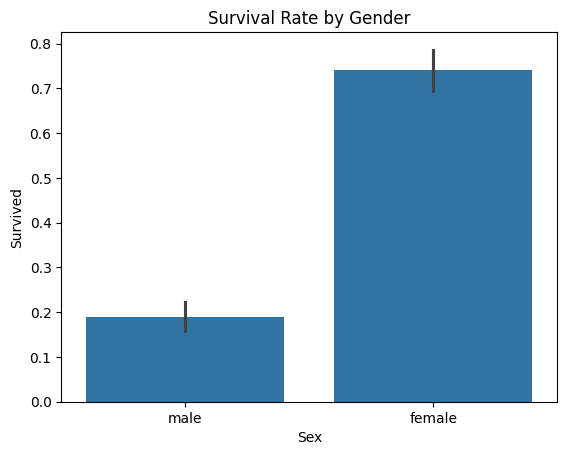

In [8]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


-->Insight:

1st Class → highest survival.

3rd Class → lowest survival.*

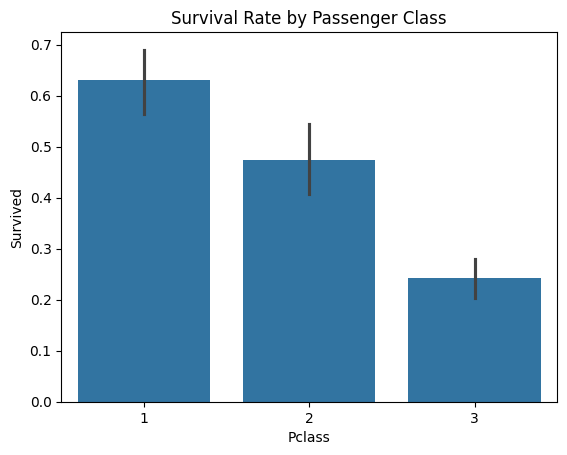

In [9]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


. Small families (2–4 people) had better survival.

. Alone or large families had lower survival.

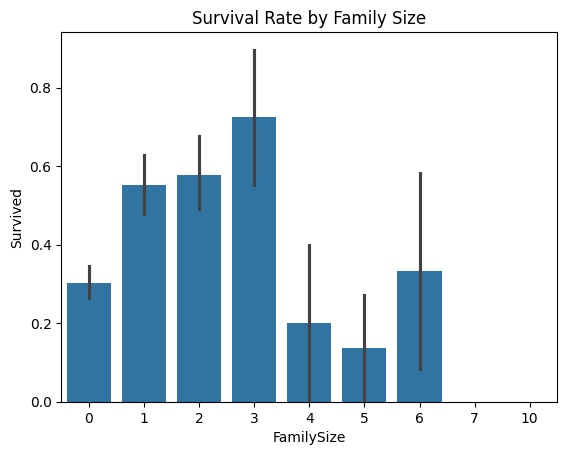

In [10]:
# Create Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"]

sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()


-->Output & Insight:

. Interactive histogram → hover to see counts.

. Younger passengers (kids, teens) had better survival.

In [11]:
fig = px.histogram(df, x="Age", color="Survived", nbins=30, barmode="overlay")
fig.update_layout(title="Age Distribution by Survival")
fig.show()
